In [13]:
#cd C:\Users\qpatole\Programming\WingDataFiles\bee\wings\WingIndexFiles

In [56]:
cd C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles

C:\Homeroot\00Biodling\bee\WingDataFiles\bee\wings\WingIndexFiles


In [110]:
# Gula italienska - Apis Mellifera Ligustica
# Gråa krainerbin - Apis Mellifera Carnica
# Mörka nordiska bin - Apis Mellifera Mellifera
# Buckfast - Blanding???

def isApisMelliferaMellifera(Ci, Dv):
    if Dv < 0 and Ci < 1.9:
        return 1
    return 0

def isApisMelliferaCarnica(Ci, Dv):
    if 0 < Dv < 10 and 2.1 < Ci < 6:
        return 1
    return 0

def wingIndexClassification(Ci, Dv):
    if isApisMelliferaMellifera(Ci, Dv):
        return 1
    elif isApisMelliferaCarnica(Ci, Dv):
        return 2
    else:
        return 0
    
class_names = ['Other', 'Millifiera', 'Carnica']    

In [111]:
import os
import json
import numpy as np
import random
#cwd = os.path.join("C:\\","Users","qpatole","Programming","WingDataFiles","bee","wings","WingIndexFiles")
cwd = os.path.join("C:\\","Homeroot","00Biodling","bee","WingDataFiles","bee","wings","WingIndexFiles")

def train_test_split_by_category(x, y, test_size=0.2):
    print("x shape " + str(x.shape))
    print("y shape " + str(y.shape))
    print("Millifiera: " + str(np.sum(y==1)))
    print("Carnica: " + str(np.sum(y==2)))
    print("Other: " + str(np.sum(y==0)))
    
    #Devide by category
    byCategory = []
    train = np.empty([0,3])
    test = np.empty([0,3])
    #print ("Len data       " + str(len(x)))
    for i in range(0,3):
        data = np.column_stack((x,y))
        byCategory.append(data[data[:,2]==i])
        np.random.shuffle(byCategory[i])
        #print ("Len category " + str(i) + " " + str(len(byCategory[i])))
        split_pos = int(len(byCategory[i])*(test_size))
        #print ("Split pos " + str(split_pos))
        train = np.vstack((train, byCategory[i][split_pos:]))
        test = np.vstack((test, byCategory[i][:split_pos]))
            
        #print("Train shape: " + str(train.shape))
        #print("Test shape: " + str(test.shape))
    return (train[:,0:2], train[:,[2]], test[:,0:2], test[:,[2]])    




def load_DvCi_data(path):
    x_train = []
    y_train = []
    for file in os.listdir(path):
        if not ".json" in file:
            continue
        with open(file) as json_file:  
            data = json.load(json_file)
            for wings in data["wings"]:
                #print (wings["image"] + ", Dv: " + str(wings["Dv"]) + ", Ci: " + str(wings["Ci"]) + ", isApisMelliferaMellifera " + str(isApisMelliferaMellifera(wings["Ci"], wings["Dv"])))
                x_train.append([wings["Dv"], wings["Ci"]])
                #y_train.append(isApisMelliferaMellifera(wings["Ci"], wings["Dv"]))
                y_train.append(wingIndexClassification(wings["Ci"], wings["Dv"]))
                #print(wingIndexClassification(wings["Ci"], wings["Dv"])) 
    return train_test_split_by_category(np.array(x_train), np.array(y_train))

(x_train, y_train, x_test, y_test) = load_DvCi_data(cwd)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("train")
print("Millifiera: " + str(np.sum(y_train[:,0]==1)))
print("Carnica: " + str(np.sum(y_train[:,0]==2)))
print("Other: " + str(np.sum(y_train[:,0]==0)))
print("test")
print("Millifiera: " + str(np.sum(y_test[:,0]==1)))
print("Carnica: " + str(np.sum(y_test[:,0]==2)))
print("Other: " + str(np.sum(y_test[:,0]==0)))


x shape (1411, 2)
y shape (1411,)
Millifiera: 1290
Carnica: 50
Other: 71
(1129, 2)
(1129, 1)
(282, 2)
(282, 1)
train
Millifiera: 1032
Carnica: 40
Other: 57
test
Millifiera: 258
Carnica: 10
Other: 14


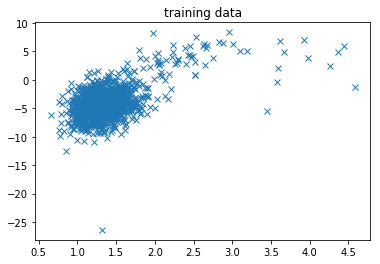

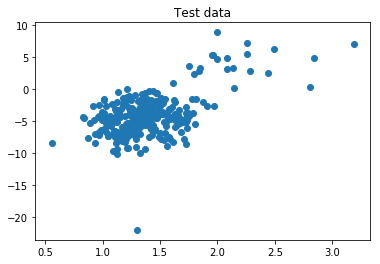

In [113]:
plt.figure()
plt.title("training data")
plt.plot(x_train[:,1],x_train[:,0], 'x')
plt.figure()
plt.title("Test data")
plt.scatter(x_test[:,1],x_test[:,0])

In [100]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    #keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [101]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1129/1129 [==============================] - 1s 782us/sample - loss: 1.4030 - acc: 0.0505
Epoch 2/50
1129/1129 [==============================] - 0s 135us/sample - loss: 1.0410 - acc: 0.2161
Epoch 3/50
1129/1129 [==============================] - 0s 116us/sample - loss: 0.7665 - acc: 0.9114
Epoch 4/50
1129/1129 [==============================] - 0s 111us/sample - loss: 0.5895 - acc: 0.9415
Epoch 5/50
1129/1129 [==============================] - 0s 108us/sample - loss: 0.4789 - acc: 0.9424
Epoch 6/50
1129/1129 [==============================] - 0s 127us/sample - loss: 0.3967 - acc: 0.9451
Epoch 7/50
1129/1129 [==============================] - 0s 135us/sample - loss: 0.3333 - acc: 0.9460
Epoch 8/50
1129/1129 [==============================] - 0s 98us/sample - loss: 0.2850 - acc: 0.9477
Epoch 9/50
1129/1129 [==============================] - 0s 104us/sample - loss: 0.2487 - acc: 0.9477
Epoch 10/50
1129/1129 [==============================] - 0s 128us/sample - loss: 0.2213 - ac

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

282/282 [==============================] - 0s 1ms/sample - loss: 0.1263 - acc: 0.9645
Test accuracy: 0.964539


In [104]:
predictions = model.predict(x_train)

In [105]:
predictions[0]

array([4.3979010e-01, 8.8906971e-05, 5.6012106e-01], dtype=float32)

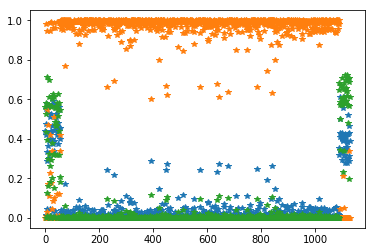

In [109]:
plt.figure()
plt.plot(predictions, '*')

In [106]:
predictions.shape

(1129, 3)

In [87]:
[a for a in predictions if a[0] > 0.1 and a[0] < 0.9]

[array([0.48019862, 0.00569106, 0.5141103 ], dtype=float32),
 array([0.4868894 , 0.01250637, 0.5006042 ], dtype=float32),
 array([0.68239665, 0.0379935 , 0.27960977], dtype=float32),
 array([0.48019862, 0.00569106, 0.5141103 ], dtype=float32),
 array([4.4336233e-01, 2.5218882e-04, 5.5638552e-01], dtype=float32),
 array([0.48942983, 0.02795663, 0.48261362], dtype=float32),
 array([0.51842284, 0.04938578, 0.4321914 ], dtype=float32),
 array([4.1705275e-01, 3.0230982e-05, 5.8291703e-01], dtype=float32),
 array([0.46241948, 0.00118362, 0.5363969 ], dtype=float32),
 array([3.6764017e-01, 5.0425638e-07, 6.3235933e-01], dtype=float32),
 array([4.4032401e-01, 1.9752346e-04, 5.5947852e-01], dtype=float32),
 array([2.6920027e-01, 6.0036191e-11, 7.3079979e-01], dtype=float32),
 array([3.7896135e-01, 1.3111536e-06, 6.2103736e-01], dtype=float32),
 array([0.45992783, 0.40077433, 0.13929778], dtype=float32),
 array([0.39608434, 0.48580942, 0.1181063 ], dtype=float32),
 array([3.7123844e-01, 6.841261

In [88]:
print(predictions)

[[4.8019862e-01 5.6910594e-03 5.1411033e-01]
 [4.8688939e-01 1.2506366e-02 5.0060421e-01]
 [6.8239665e-01 3.7993502e-02 2.7960977e-01]
 ...
 [8.2623982e-01 4.7818430e-02 1.2594171e-01]
 [6.2279463e-01 1.2942126e-02 3.6426327e-01]
 [3.3056468e-01 1.9988958e-08 6.6943532e-01]]
